# Lasso

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys

sys.path.append(path_) 

# Regresor

In [70]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 0.01, prior='log-uniform'),
                'max_iter': Integer(1000, 10000),
                #'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


# Clasificador

In [3]:
from base_classifier import BaseClassifier
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una función para graficar el boxplot
def graficar_boxplot_horizontal(dataframes, labels, variable, group_by, colores, title="Boxplot por Región"):
   
    # Crear una lista para almacenar los datos combinados
    datos_combinados = []
    for df, label in zip(dataframes, labels):
        temp_df = df[[group_by, variable]].copy()
        temp_df['Dataset'] = label
        datos_combinados.append(temp_df)
    
    # Concatenar todos los dataframes
    datos_combinados = pd.concat(datos_combinados, ignore_index=True)

    # Crear el gráfico de boxplot
    plt.figure(figsize=(8, 8))
    sns.boxplot(
        data=datos_combinados, 
        y=group_by, 
        x=variable, 
        hue='Dataset',
        palette=colores
    )
    plt.title(title, fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel(group_by, fontsize=14)
    plt.legend(title='Dataset', fontsize=12, loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Instancia de modelos 

In [71]:
from Plotter import Plotter
from sklearn.preprocessing import MinMaxScaler,StandardScaler



model_reg = LassoRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'Lasso'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


# Data

In [5]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [36]:
features = [ 'IAF_ORB_left', 'TF_ORB_left', 'IAF_SFG_right', 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [37]:
len(features)

60

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_Clock/data_freq/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_Clock/data_freq/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_Clock/data_freq/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_Clock/data_freq/MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

regiones = ["America", "Turquia", "Europa"]
countrys =  ["Chile", "Argentina", "Colombia", "Brasil", "Turquia", "Reino Unido", "Grecia", "Irlanda"]

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones)] # Se saca Turquia

#df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Country_unique"].isin(countrys)] # Se saca Turquia

df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [39]:
X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID_unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID_unique"]

In [40]:
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)


C:\Users\felip\AppData\Local\Temp\ipykernel_190680\4186456513.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gini.values, y=avg_gini.index, palette=colors)


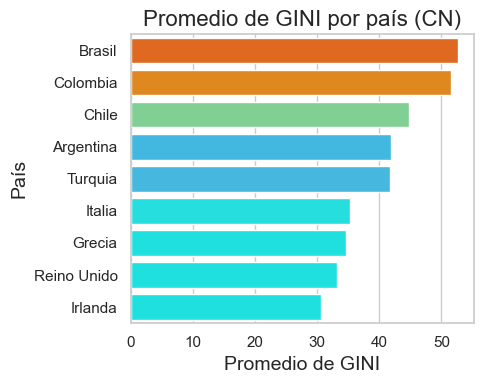

C:\Users\felip\AppData\Local\Temp\ipykernel_190680\4186456513.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gini.values, y=avg_gini.index, palette=colors)


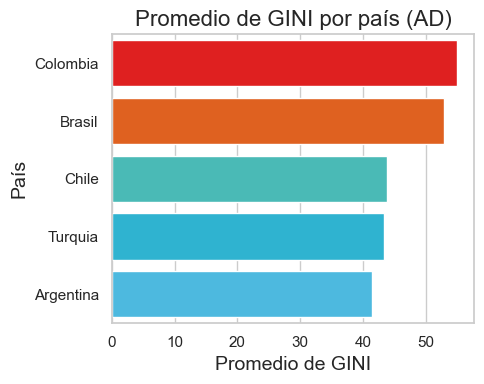

C:\Users\felip\AppData\Local\Temp\ipykernel_190680\4186456513.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gini.values, y=avg_gini.index, palette=colors)


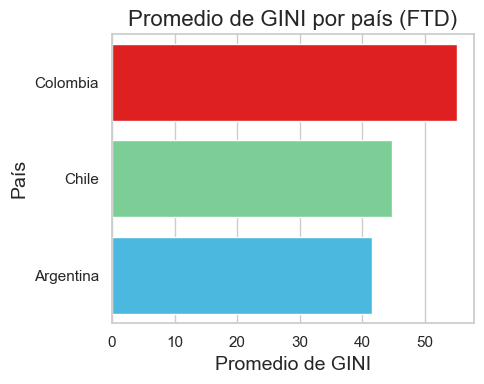

C:\Users\felip\AppData\Local\Temp\ipykernel_190680\4186456513.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gini.values, y=avg_gini.index, palette=colors)


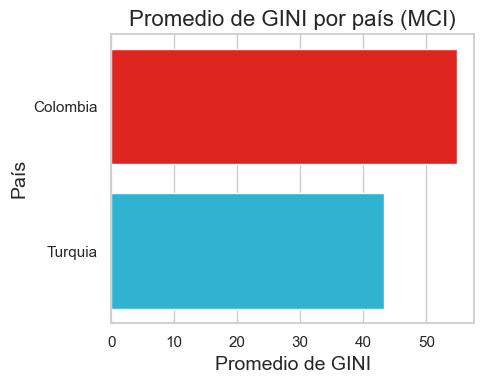

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Lista de dataframes y sus nombres correspondientes
dataframes = [
    ("CN", df_CN_filtrado),
    ("AD", df_AD_filtrado),
    ("FTD", df_FTD_filtrado),
    ("MCI", df_MCI_filtrado)
]

# Estilo para los gráficos
sns.set(style="whitegrid")

colors_base = ["#00FFFF",  # Celeste
               "#87CEEB",  # Azul más claro
               "#00BFFF",  # Azul claro
               "#FFFF00",  # Amarillo
               "#FFA500",  # Naranjo
               "#FF0000"]  # Rojo

# Creamos el colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list("CustomCmap", colors_base)

# Definir la normalización en el rango [35, 55]
norm = Normalize(vmin=35, vmax=55)

# Iterar sobre cada grupo y generar el gráfico
for name, df in dataframes:
    # Agrupar por país y calcular el promedio de GINI
    avg_gini = df.groupby("Country_unique")["GINI"].mean().sort_values(ascending=False)
    
    # Normalizar los valores de GINI para que se ajusten al rango [35, 55]
    colors = [custom_cmap(norm(value)) for value in avg_gini.values]
    
    # Crear el gráfico
    plt.figure(figsize=(5, 4))
    sns.barplot(x=avg_gini.values, y=avg_gini.index, palette=colors)
    plt.title(f'Promedio de GINI por país ({name})', fontsize=16)
    plt.xlabel('Promedio de GINI', fontsize=14)
    plt.ylabel('País', fontsize=14)
    plt.tight_layout()
    
    # Mostrar o guardar el gráfico
    plt.show()


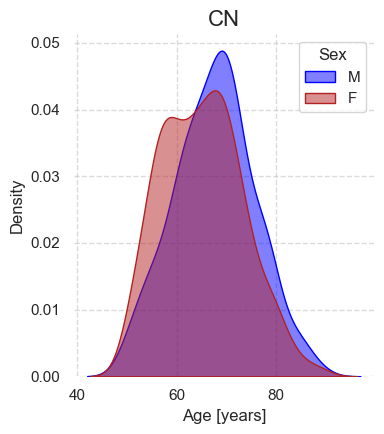

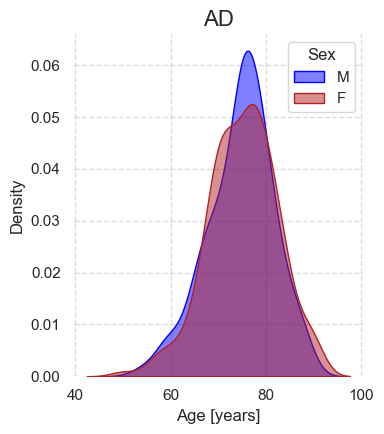

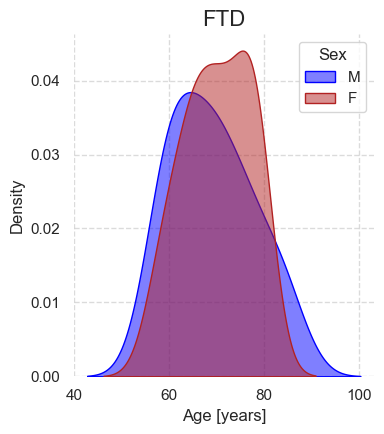

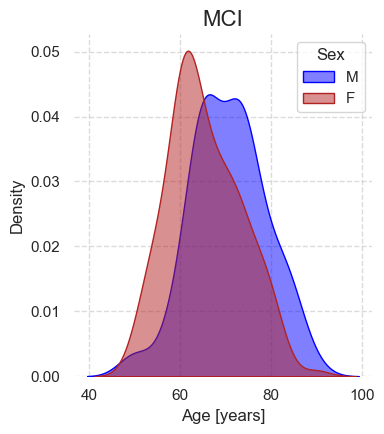

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo blanco para eliminar bordes
sns.set(style='white')

# Crear una función para graficar la distribución de la edad por sexo para cada grupo
def plot_age_distribution(df, group_name):
    # Calcular los totales para masculino y femenino
    n_masculino = df[df['Sex'] == 1].shape[0]
    n_femenino = df[df['Sex'] == 2].shape[0]

    # Crear el gráfico
    plt.figure(figsize=(4, 4.5))
    sns.kdeplot(
        data=df[df['Sex'] == 1],  # Masculino
        x="Age", 
        fill=True,  # Sombrear el área bajo la curva
        color="blue", 
        label="M", 
        alpha=0.5  # Transparencia para superponer mejor
    )
    sns.kdeplot(
        data=df[df['Sex'] == 2],  # Femenino
        x="Age", 
        fill=True,  # Sombrear el área bajo la curva
        color="firebrick", 
        label="F", 
        alpha=0.5  # Transparencia para superponer mejor
    )

    # Personalización del gráfico
    plt.title(f"{group_name}", fontsize=16)
    plt.xlabel("Age [years]", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="Sex")
    plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

    # Eliminar los bordes del gráfico
    ax = plt.gca()  # Obtener el objeto del gráfico
    ax.spines['top'].set_visible(False)    # Eliminar el borde superior
    ax.spines['right'].set_visible(False)  # Eliminar el borde derecho
    ax.spines['left'].set_visible(False)   # Eliminar el borde izquierdo
    ax.spines['bottom'].set_visible(False) # Eliminar el borde inferior

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamar a la función para cada dataframe filtrado
plot_age_distribution(df_CN_filtrado, "CN")
plot_age_distribution(df_AD_filtrado, "AD")
plot_age_distribution(df_FTD_filtrado, "FTD")
plot_age_distribution(df_MCI_filtrado, "MCI")


In [232]:
X_CN

Alpha2_canon_EPP_HPC_left  Alpha2_canon_EPP_HPC_right  \
0                     0.008578                    0.007068   
1                     0.006096                    0.008411   
2                     0.007762                    0.008415   
3                     0.008545                    0.008355   
4                     0.006414                    0.006540   
..                         ...                         ...   
256                   0.007669                    0.008426   
257                   0.006954                    0.006618   
258                   0.010784                    0.010763   
259                   0.011437                    0.011171   
260                   0.007080                    0.007669   

     Alpha2_canon_EPP_PARIET_left  Alpha2_canon_EPP_PARIET_right  \
0                        0.006751                       0.008861   
1                        0.006677                       0.009440   
2                        0.006764                       0.007277   
3                        0.008367                       0.009050   
4                        0.008406                       0.007504   
..                            ...                            ...   
256                      0.007006                       0.008673   
257                      0.005141                       0.005685   
258                      0.007001                       0.007620   
259                      0.009038                       0.011523   
260                      0.006360                       0.007853   

     Alpha2_canon_EPP_OCC_left  Alpha2_canon_EPP_OCC_right  \
0                     0.006848                    0.006815   
1                     0.007105                    0.010014   
2                     0.006748                    0.006926   
3                     0.008579                    0.008388   
4                     0.006262                    0.008506   
..                         ...                         ...   
256                   0.007803                    0.009830   
257                   0.007440                    0.006692   
258                   0.008773                    0.008320   
259                   0.009255                    0.009590   
260                   0.008180                    0.009289   

     Alpha2_canon_RPD_HPC_left  Alpha2_canon_RPD_HPC_right  \
0                     0.001225                    0.001010   
1                     0.000871                    0.001202   
2                     0.001109                    0.001202   
3                     0.001221                    0.001194   
4                     0.000916                    0.000934   
..                         ...                         ...   
256                   0.001096                    0.001204   
257                   0.000993                    0.000945   
258                   0.001541                    0.001538   
259                   0.001634                    0.001596   
260                   0.001011                    0.001096   

     Alpha2_canon_RPD_CING_left  Alpha2_canon_RPD_CING_right  ...  \
0                      0.001039                     0.000962  ...   
1                      0.000993                     0.001086  ...   
2                      0.000869                     0.000864  ...   
3                      0.001325                     0.001313  ...   
4                      0.000986                     0.001019  ...   
..                          ...                          ...  ...   
256                    0.000931                     0.001048  ...   
257                    0.000795                     0.000853  ...   
258                    0.000889                     0.000999  ...   
259                    0.001084                     0.001123  ...   
260                    0.000967                     0.001083  ...   

     IAF_MFG_left  IAF_MFG_right  IAF_SFG_left  IAF_SFG_right  IAF_HPC_left  \
0           8.000          8.000        8.187

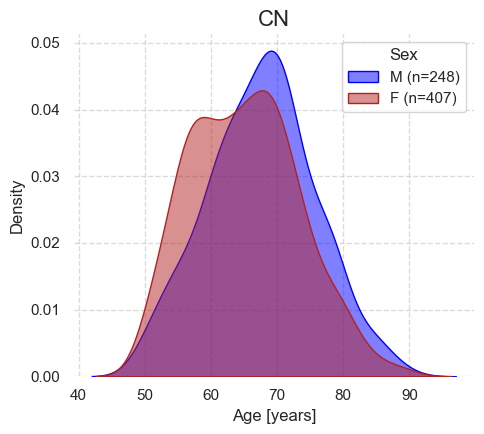

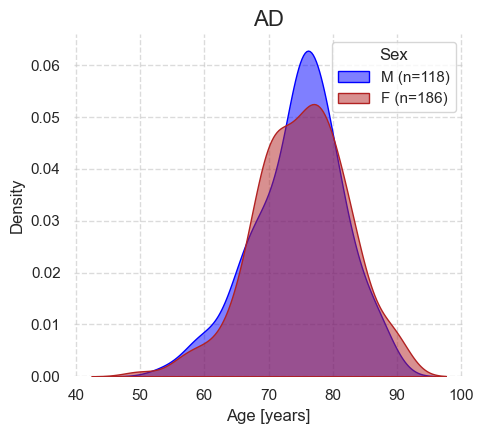

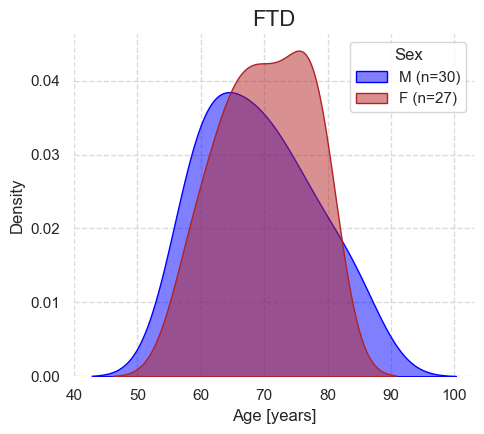

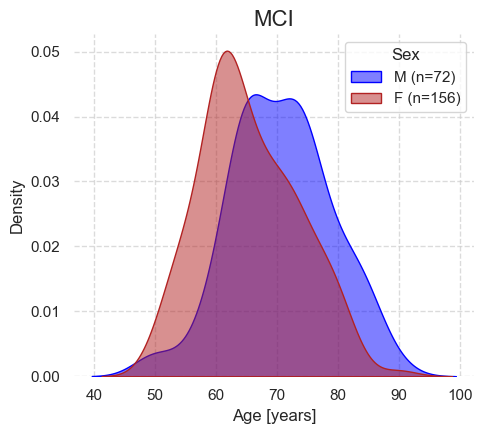

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo blanco para eliminar bordes
sns.set(style='white')

# Crear una función para graficar la distribución de la edad por sexo para cada grupo
def plot_age_distribution(df, group_name):
    # Calcular los totales para masculino y femenino
    n_masculino = df[df['Sex'] == 1].shape[0]
    n_femenino = df[df['Sex'] == 2].shape[0]

    # Crear etiquetas personalizadas para la leyenda
    label_masculino = f"M (n={n_masculino})"
    label_femenino = f"F (n={n_femenino})"

    # Crear el gráfico
    plt.figure(figsize=(5, 4.5))
    sns.kdeplot(
        data=df[df['Sex'] == 1],  # Masculino
        x="Age", 
        fill=True,  # Sombrear el área bajo la curva
        color="blue", 
        label=label_masculino,  # Etiqueta personalizada
        alpha=0.5  # Transparencia para superponer mejor
    )
    sns.kdeplot(
        data=df[df['Sex'] == 2],  # Femenino
        x="Age", 
        fill=True,  # Sombrear el área bajo la curva
        color="firebrick", 
        label=label_femenino,  # Etiqueta personalizada
        alpha=0.5  # Transparencia para superponer mejor
    )

    # Personalización del gráfico
    plt.title(f"{group_name}", fontsize=16)
    plt.xlabel("Age [years]", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="Sex")
    plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

    # Eliminar los bordes del gráfico
    ax = plt.gca()  # Obtener el objeto del gráfico
    ax.spines['top'].set_visible(False)    # Eliminar el borde superior
    ax.spines['right'].set_visible(False)  # Eliminar el borde derecho
    ax.spines['left'].set_visible(False)   # Eliminar el borde izquierdo
    ax.spines['bottom'].set_visible(False) # Eliminar el borde inferior

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamar a la función para cada dataframe filtrado
plot_age_distribution(df_CN_filtrado, "CN")
plot_age_distribution(df_AD_filtrado, "AD")
plot_age_distribution(df_FTD_filtrado, "FTD")
plot_age_distribution(df_MCI_filtrado, "MCI")


# Hyperparameters Tunning

In [72]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model_reg.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [73]:
with open(f'results_model/opt_Lasso.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

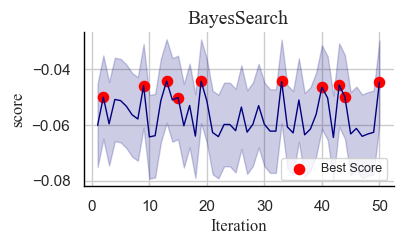

Top 1: Iteration 13, Score -0.044244511191902945
Top 2: Iteration 19, Score -0.04429909317029741
Top 3: Iteration 33, Score -0.0443884638573638
Top 4: Iteration 50, Score -0.04468244891872195
Top 5: Iteration 43, Score -0.04567910980700379
Top 6: Iteration 9, Score -0.04592858046876119
Top 7: Iteration 40, Score -0.046429405732948625
Top 8: Iteration 44, Score -0.049931840629708554
Top 9: Iteration 2, Score -0.05003233743269947
Top 10: Iteration 15, Score -0.050163109062776254


In [74]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [75]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.01, 'max_iter': 1000},
 {'alpha': 0.01, 'max_iter': 10000},
 {'alpha': 0.009943956008917886, 'max_iter': 8222},
 {'alpha': 0.009751998967336074, 'max_iter': 2294},
 {'alpha': 0.009167045308870777, 'max_iter': 8690},
 {'alpha': 0.00902563956793476, 'max_iter': 7306},
 {'alpha': 0.008742341212145833, 'max_iter': 4149},
 {'alpha': 0.006926808410599282, 'max_iter': 4154},
 {'alpha': 0.006876831063110333, 'max_iter': 8950},
 {'alpha': 0.00681265015868589, 'max_iter': 3836}]

# Training

In [76]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params_[0]
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [77]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     76.07
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.15e-17
Time:                        21:55:40   Log-Likelihood:                -1477.0
No. Observations:                 672   AIC:                             2958.
Df Residuals:                     670   BIC:                             2967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2533      0.684     88.027      0.0

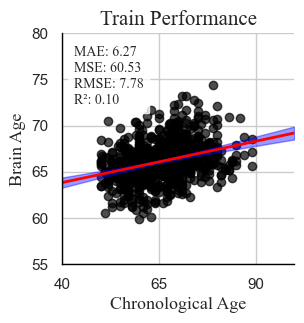

Error medio absoluto: 6.274257793026674
Error cuadrático medio: 60.525110086847725
Raíz del error cuadrático medio: 7.779788563119677
Coeficiente de determinación (R²): 0.10044180042152706


In [78]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [80]:
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [81]:
np.mean(df_AD_avg_test['GAP_corrected'])

0.7270428196891485

In [82]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')



df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')



In [117]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_results_test.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_results_test.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_results_test.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_results_test.xlsx', index=False)


In [118]:
df_clasificacion_CN = df_CN_combined[["GAP_corrected", "Sex", "Educ", "MMSE", "GINI"]]


In [119]:
df_clasificacion_CN.to_excel("results/df_clasificacion_CN.xlsx", index=False)


In [120]:
import pandas as pd

# Agregar la columna de diagnóstico antes de concatenar
df_CN_combined["Diagnosis"] = 1
df_AD_combined["Diagnosis"] = 2
df_FTD_combined["Diagnosis"] = 3
df_MCI_combined["Diagnosis"] = 4

# Concatenar los dataframes
df_combined_all = pd.concat([df_CN_combined, df_AD_combined, df_FTD_combined, df_MCI_combined], ignore_index=True)

# Seleccionar las columnas deseadas
df_clasificacion_all = df_combined_all[["GAP_corrected", "Sex", "Educ", "MMSE", "GINI", "Diagnosis"]]

# Mostrar las primeras filas del dataframe resultante
print(df_clasificacion_all.head())

# Guardar en un archivo Excel
df_clasificacion_all.to_excel("results/df_Clasificacion_todos_los_grupos.xlsx", index=False)


   GAP_corrected  Sex  Educ  MMSE       GINI  Diagnosis
0       5.560491  2.0  15.0  29.0  41.793333          1
1      -3.468510  2.0  15.0  30.0  41.793333          1
2       2.651594  2.0  15.0  30.0  41.793333          1
3       1.720712  1.0  15.0  28.0  41.793333          1
4      -1.099279  2.0  14.0  27.0  41.793333          1


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


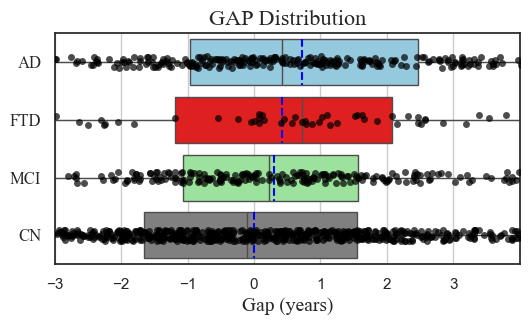

In [84]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

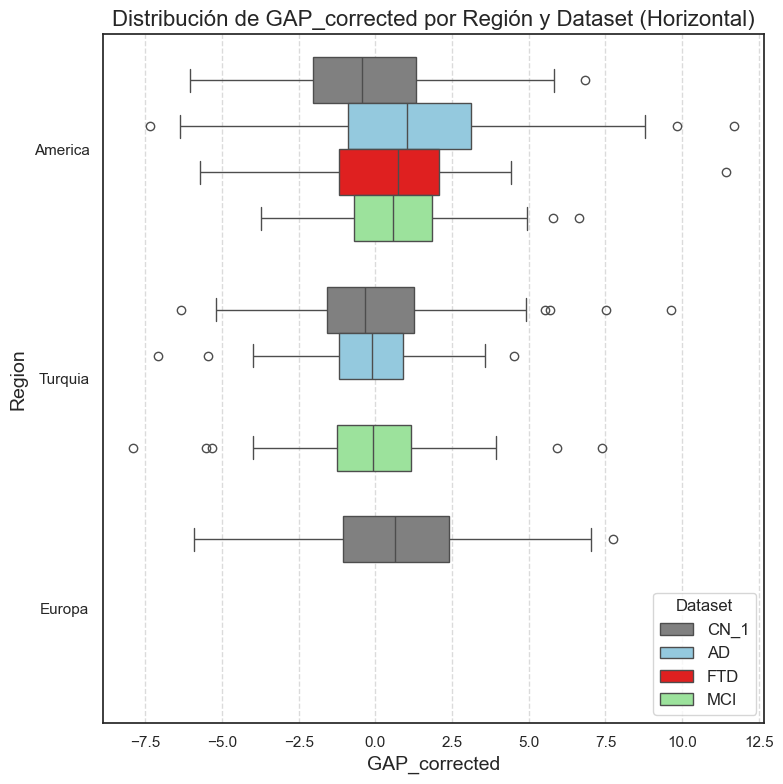

In [85]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined,  df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN_1",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


C:\Users\felip\AppData\Local\Temp\ipykernel_190680\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_190680\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_190680\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_190680\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

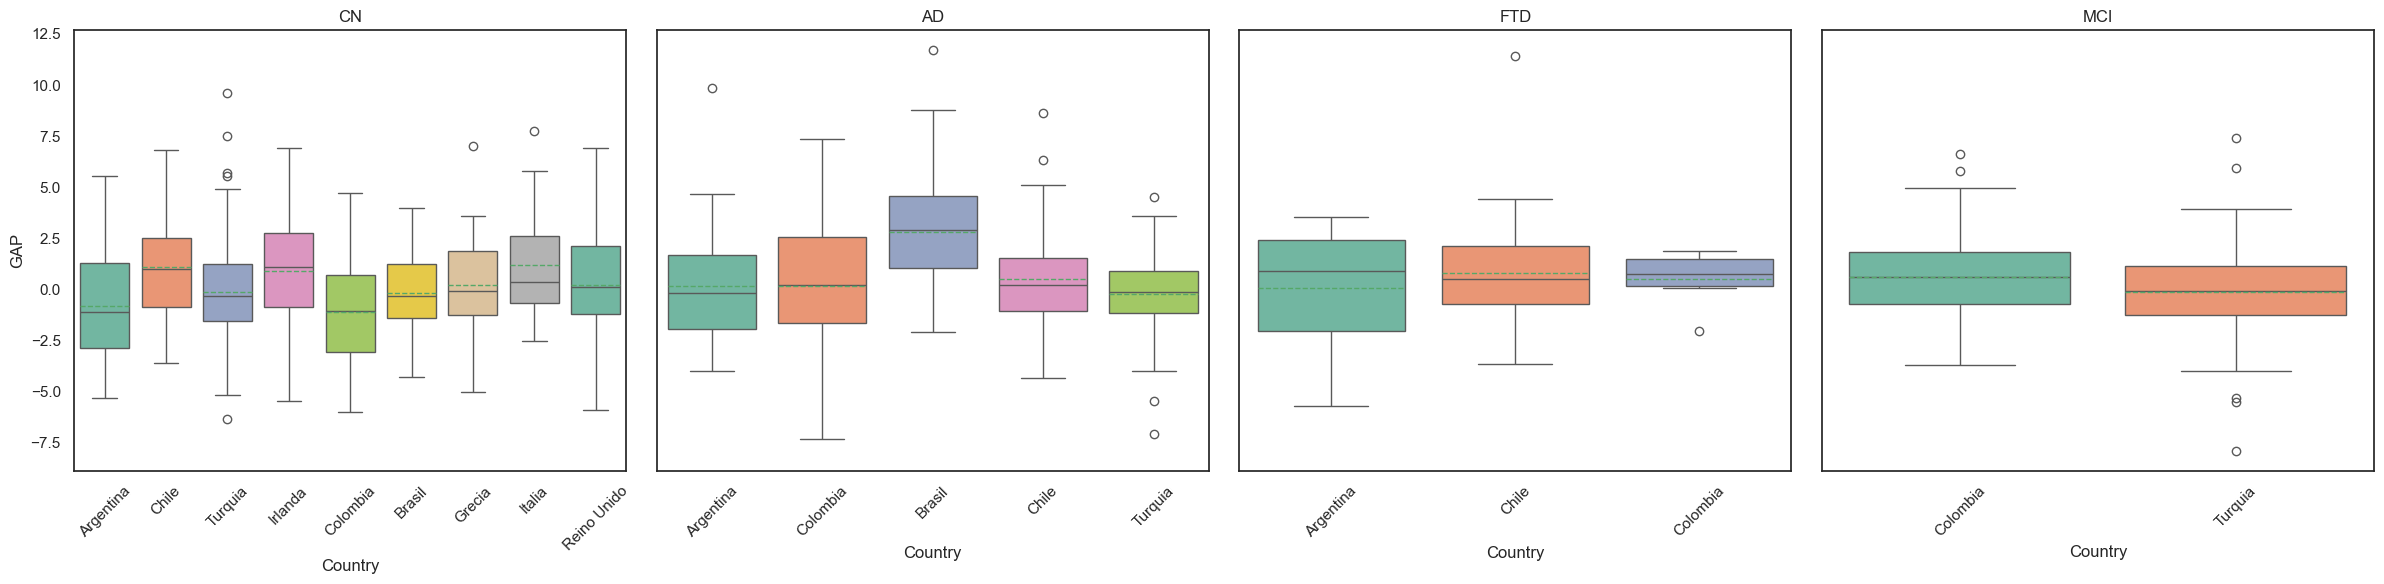

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar boxplots de GAP_corrected por Country_unique
def plot_gap_corrected_by_country(dataframes, titles):
    """
    Genera boxplots de la variable GAP_corrected por Country_unique para múltiples dataframes.
    
    :param dataframes: Lista de dataframes a graficar.
    :param titles: Lista de títulos para cada gráfico, en el mismo orden que los dataframes.
    """
    num_plots = len(dataframes)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6), sharey=True)
    
    # Asegurarse de que axes sea un iterable si hay solo un gráfico
    if num_plots == 1:
        axes = [axes]
    
    for i, (df, title) in enumerate(zip(dataframes, titles)):
        sns.boxplot(
            data=df,
            x='Country_unique',
            y='GAP_corrected',
            ax=axes[i],
            palette='Set2',
            showmeans=True,
            meanline=True
        )
        axes[i].set_title(title)
        axes[i].set_xlabel("Country")
        axes[i].set_ylabel("GAP")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Lista de dataframes y títulos
dataframes = [df_CN_combined, df_AD_combined, df_FTD_combined, df_MCI_combined]
titles = ["CN", "AD", "FTD", "MCI"]

# Llamada a la función
plot_gap_corrected_by_country(dataframes, titles)


In [87]:
import pandas as pd
from scipy.stats import f_oneway

# Datos: Asegúrate de que cada variable contiene los valores de GAP de cada grupo
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

# Realizar ANOVA
anova_test = f_oneway(corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test)

# Mostrar resultados
print("Resultados de ANOVA:")
print(f"F-statistic: {anova_test.statistic:.4f}")
print(f"p-value: {anova_test.pvalue:.4f}")

# Interpretación
if anova_test.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos (p < 0.05).")
else:
    print("No hay diferencias significativas entre los grupos (p >= 0.05).")


Resultados de ANOVA:
F-statistic: 6.0731
p-value: 0.0004
Hay diferencias significativas entre los grupos (p < 0.05).


# Pesos del modelo

In [108]:
import numpy as np

# Suponiendo que `results_model_sin_cuba['model']` contiene los modelos entrenados
modelos = results_model['model']

# Lista para almacenar los coeficientes de cada modelo
pesos_modelos = []

for modelo in modelos:
    pesos_modelos.append(modelo.coef_)

# Convertir a un arreglo de NumPy para facilitar operaciones
pesos_modelos = np.array(pesos_modelos)

# Calcular el promedio de los pesos
pesos_promedio = np.mean(pesos_modelos, axis=0)

#print("Pesos promedio de los modelos:")
#print(pesos_promedio)


In [109]:
import pandas as pd
import numpy as np

# Suponiendo que `features` es una lista de las columnas relevantes
features = df_CN_filtrado[features].columns.tolist()

# Asegúrate de que el número de características coincida con los pesos promedio
if len(features) != len(pesos_promedio):
    raise ValueError("El número de características no coincide con el número de pesos promedio.")

# Crear un dataframe para visualizar nombres de características y sus pesos promedio
pesos_df = pd.DataFrame({
    'Característica': features,
    'Peso promedio': pesos_promedio
})

#print("Pesos promedio asociados a las características:")
#print(pesos_df)


In [111]:
import pandas as pd

# Supongamos que ya tienes el DataFrame pesos_df
# Ordenar por magnitud del peso promedio
pesos_df_ordenado = pesos_df.reindex(pesos_df['Peso promedio'].abs().sort_values(ascending=False).index)

# Mostrar el DataFrame ordenado
print(pesos_df_ordenado)


                     Característica  Peso promedio
30      Alpha2_canon_RPD_CING_right  -3.900567e+00
35      High_subj_spec_EPP_OCC_left   3.816217e+00
40       Low_subj_spec_RPD_OCC_left  -2.601457e+00
41       Alpha2_canon_RPD_CING_left   2.255827e+00
46     Alpha2_canon_EPP_PARIET_left   2.224255e+00
24        Alpha2_canon_EPP_OCC_left  -2.008440e+00
56    Low_subj_spec_RPD_PARIET_left  -1.911502e+00
48     High_subj_spec_RPD_CING_left   1.696200e+00
9       Low_subj_spec_EPP_OCC_right  -1.252066e+00
53      Low_subj_spec_RPD_HPC_right   1.185069e+00
42       Low_subj_spec_RPD_HPC_left   1.101268e+00
52      Low_subj_spec_RPD_CING_left  -1.002074e+00
50    Alpha2_canon_EPP_PARIET_right   9.560802e-01
0                      IAF_ORB_left   9.509185e-01
44     High_subj_spec_RPD_HPC_right  -7.867194e-01
28       Alpha2_canon_RPD_HPC_right   7.158759e-01
21       Alpha2_canon_RPD_OCC_right  -6.482859e-01
23                    IAF_OCC_right   6.375504e-01
17                     IAF_INS_

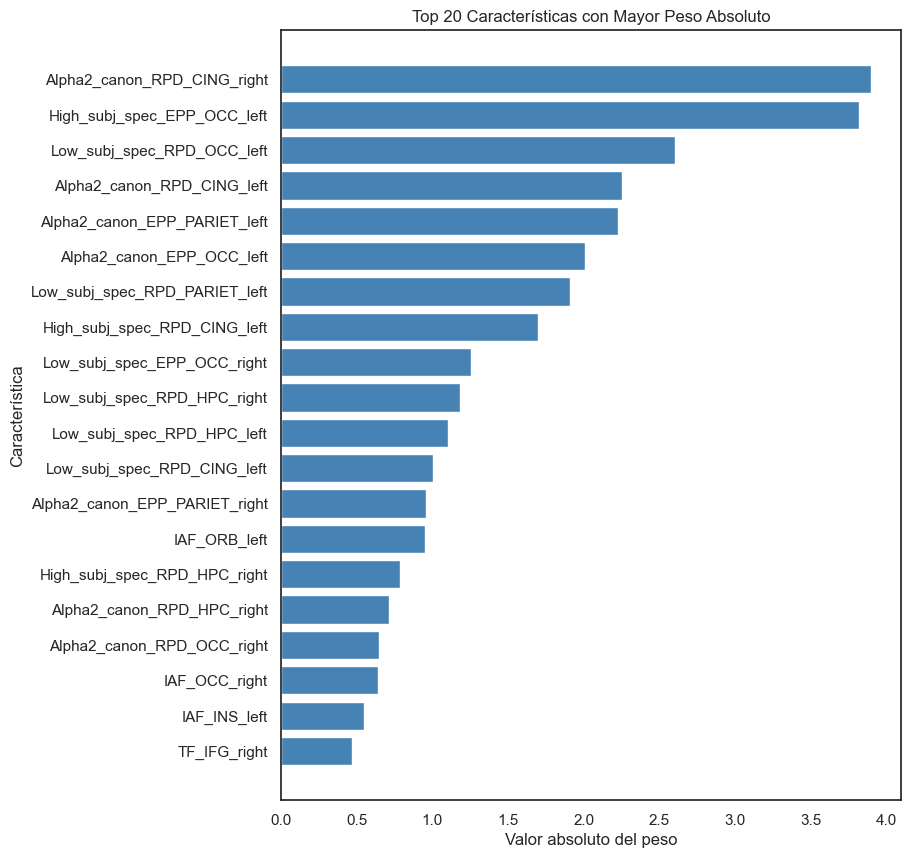

In [112]:
# Tomar las primeras 20 características y convertir los pesos a valores absolutos
pesos_df_ordenado = pesos_df_ordenado.head(20)
pesos_df_ordenado["Peso absoluto"] = pesos_df_ordenado["Peso promedio"].abs()

# Graficar
plt.figure(figsize=(8, 10))
plt.barh(pesos_df_ordenado["Característica"], pesos_df_ordenado["Peso absoluto"], color="steelblue")
plt.xlabel("Valor absoluto del peso")
plt.ylabel("Característica")
plt.title("Top 20 Características con Mayor Peso Absoluto")
plt.gca().invert_yaxis()  # Invertir eje Y para que la mayor esté arriba
plt.show()

# SHAP

In [88]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

shap_values_AD, shap_values_avg_AD, shap_summary_sorted_AD, shap_per_fold_AD = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_AD,'ID_unique', results_per_fold_CN_train, results_per_fold_AD_test, results_model['model'],scaler=Scaler_reg_train
)

shap_values_FTD, shap_values_avg_FTD, shap_summary_sorted_FTD, shap_per_fold_FTD = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_FTD,'ID_unique', results_per_fold_CN_train, results_per_fold_FTD_test, results_model['model'],scaler=Scaler_reg_train
)

shap_values_MCI, shap_values_avg_MCI, shap_summary_sorted_MCI, shap_per_fold_MCI = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_MCI,'ID_unique', results_per_fold_CN_train, results_per_fold_MCI_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
High_subj_spec_EPP_OCC_left: 2071.826666807814
Alpha2_canon_RPD_CING_right: 2066.9576880454583
Low_subj_spec_RPD_OCC_left: 1403.298446483956
Alpha2_canon_RPD_CING_left: 1212.936693040631
Alpha2_canon_EPP_PARIET_left: 1180.1778494124285
Alpha2_canon_EPP_OCC_left: 1088.4620600395867
Low_subj_spec_RPD_PARIET_left: 1005.1041219356487
High_subj_spec_RPD_CING_left: 897.4676965905703
Low_subj_spec_EPP_OCC_right: 687.9703285197709
Low_subj_spec_RPD_HPC_right: 664.4857196922094
Low_subj_spec_RPD_HPC_left: 611.0196110397941
Low_subj_spec_RPD_CING_left: 528.2000828607437
IAF_ORB_left: 510.7089935613524
Alpha2_canon_EPP_PARIET_right: 508.066496147717
High_subj_spec_RPD_HPC_right: 441.97857635047575
Alpha2_canon_RPD_HPC_right: 403.84315493718634
IAF_OCC_right: 354.01067422445567
Alpha2_canon_RPD_OCC_right: 349.5888508353761
IAF_INS_left: 301.174901426261
TF_IFG_right: 282.29334186536806
IAF_INS_right: 237.70713320488176
IAF_ORB_right: 2

In [89]:
with open('results_model/shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

with open('results_model/shap_summary_sorted_AD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_AD, f)

with open('results_model/shap_values_AD.pkl', 'wb') as f:
    pickle.dump(shap_values_AD, f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_FTD, f)

with open('results_model/shap_values_FTD.pkl', 'wb') as f:
    pickle.dump(shap_values_FTD, f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_MCI, f)

with open('results_model/shap_values_MCI.pkl', 'wb') as f:
    pickle.dump(shap_values_MCI, f)


In [ ]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_CN.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)

with open('results_model/shap_summary_sorted_AD.pkl', 'rb') as f:
    shap_summary_sorted_AD = pickle.load(f)

with open('results_model/shap_values_AD.pkl', 'rb') as f:
    shap_values_AD = pickle.load(f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'rb') as f:
    shap_summary_sorted_FTD = pickle.load(f)

with open('results_model/shap_values_FTD.pkl', 'rb') as f:
    shap_values_FTD = pickle.load(f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'rb') as f:
    shap_summary_sorted_MCI = pickle.load(f)

with open('results_model/shap_values_MCI.pkl', 'rb') as f:
    shap_values_MCI = pickle.load(f)




In [90]:
import pandas as pd

# Función para guardar un shap summary en un archivo Excel
def save_shap_summary_to_excel(shap_summary, filename):
    # Crear un DataFrame a partir del shap_summary
    df = pd.DataFrame(shap_summary, columns=['Feature', 'SHAP Value'])
    # Guardar el DataFrame en un archivo Excel
    df.to_excel(filename, index=False)

# Guardar cada shap summary en un archivo Excel
save_shap_summary_to_excel(shap_summary_sorted_CN, 'results/shap_summary_sorted_CN.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_AD, 'results/shap_summary_sorted_AD.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_FTD, 'results/shap_summary_sorted_FTD.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_MCI, 'results/shap_summary_sorted_MCI.xlsx')

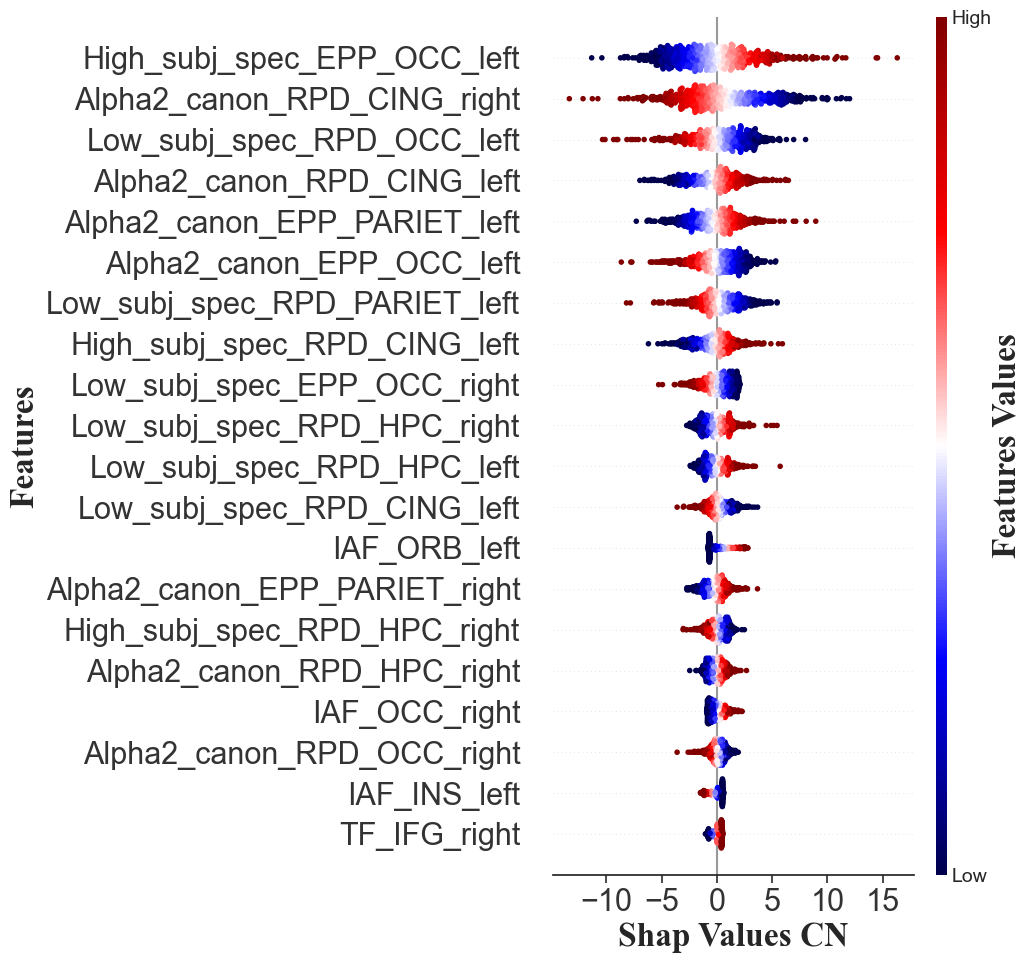

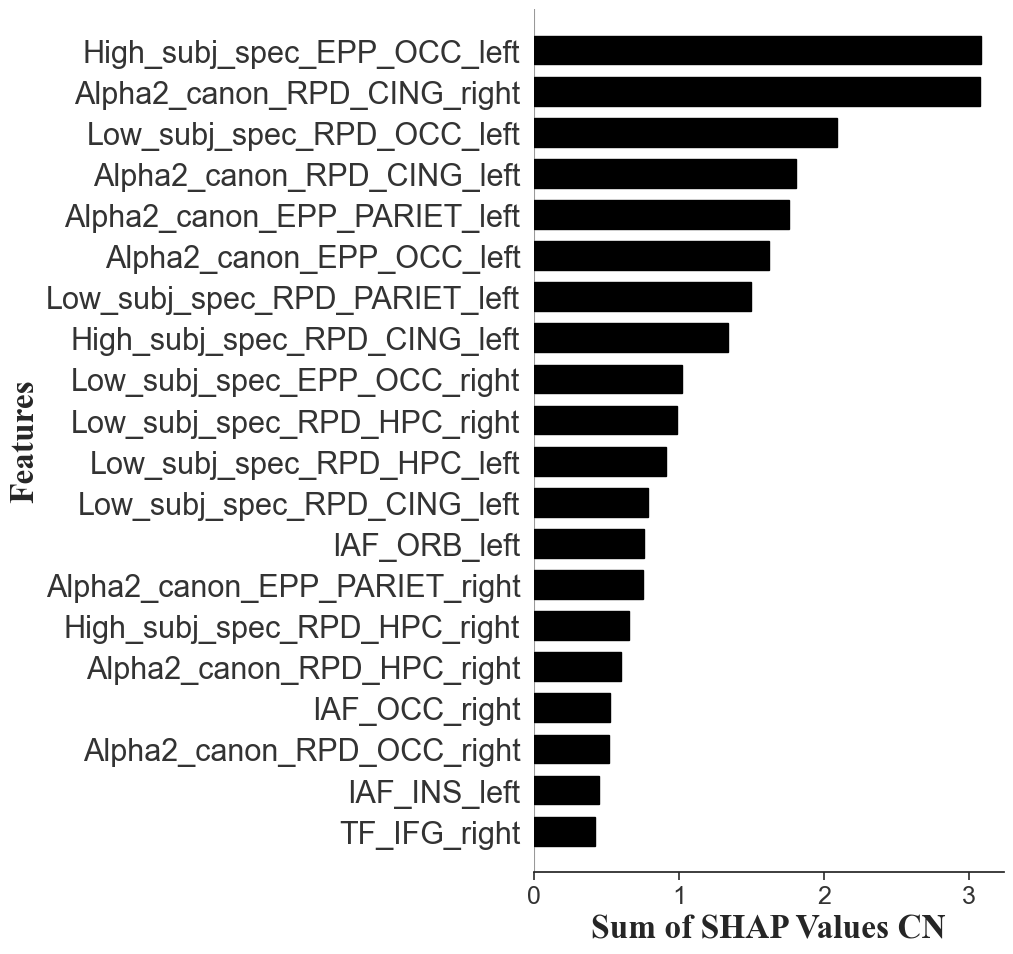

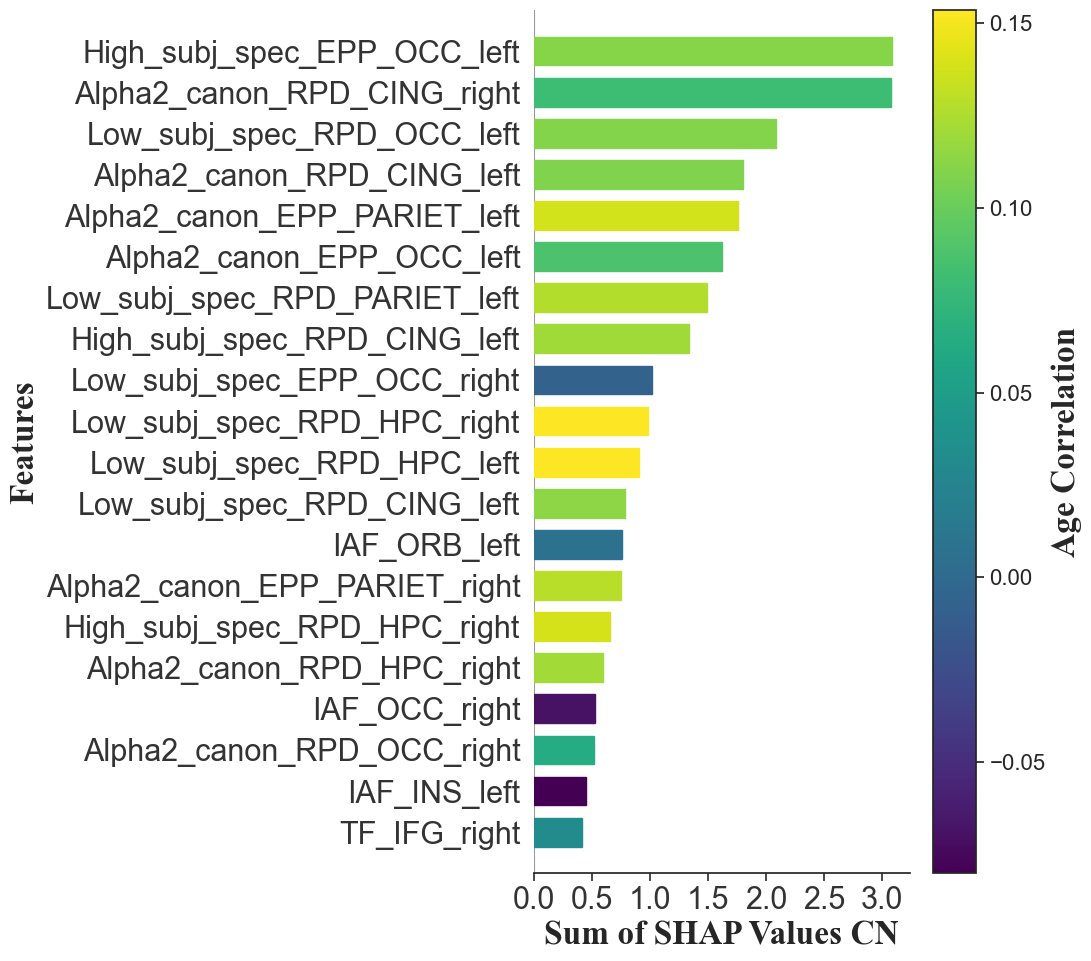

In [91]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [92]:
shap_summary_sorted_CN

[('High_subj_spec_EPP_OCC_left', 2071.826666807814),
 ('Alpha2_canon_RPD_CING_right', 2066.9576880454583),
 ('Low_subj_spec_RPD_OCC_left', 1403.298446483956),
 ('Alpha2_canon_RPD_CING_left', 1212.936693040631),
 ('Alpha2_canon_EPP_PARIET_left', 1180.1778494124285),
 ('Alpha2_canon_EPP_OCC_left', 1088.4620600395867),
 ('Low_subj_spec_RPD_PARIET_left', 1005.1041219356487),
 ('High_subj_spec_RPD_CING_left', 897.4676965905703),
 ('Low_subj_spec_EPP_OCC_right', 687.9703285197709),
 ('Low_subj_spec_RPD_HPC_right', 664.4857196922094),
 ('Low_subj_spec_RPD_HPC_left', 611.0196110397941),
 ('Low_subj_spec_RPD_CING_left', 528.2000828607437),
 ('IAF_ORB_left', 510.7089935613524),
 ('Alpha2_canon_EPP_PARIET_right', 508.066496147717),
 ('High_subj_spec_RPD_HPC_right', 441.97857635047575),
 ('Alpha2_canon_RPD_HPC_right', 403.84315493718634),
 ('IAF_OCC_right', 354.01067422445567),
 ('Alpha2_canon_RPD_OCC_right', 349.5888508353761),
 ('IAF_INS_left', 301.174901426261),
 ('TF_IFG_right', 282.2933418653

In [93]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

OCC_left: 1.000000
CING_left: 0.578186
PARIET_left: 0.478852
CING_right: 0.452924
HPC_right: 0.330947
OCC_right: 0.304929
HPC_left: 0.133890
ORB_left: 0.111910
PARIET_right: 0.111331
INS_left: 0.065995
IFG_right: 0.061858


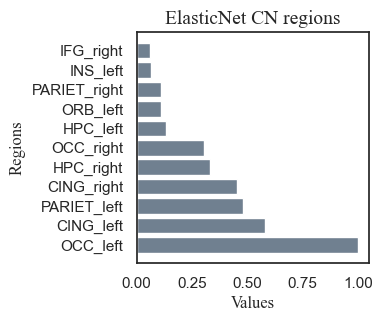

In [94]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set='ElasticNet CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

In [ ]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='slategray')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


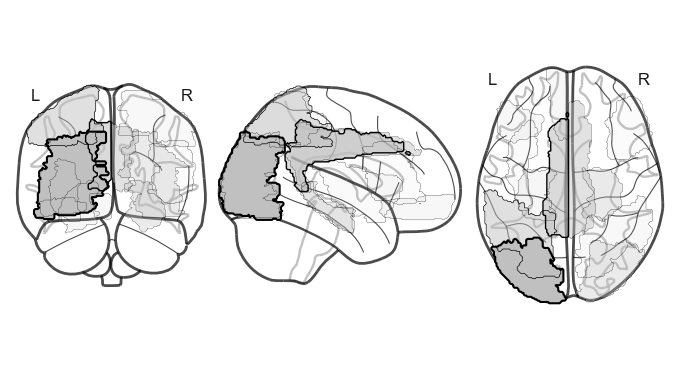

In [113]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

# SHAP AD

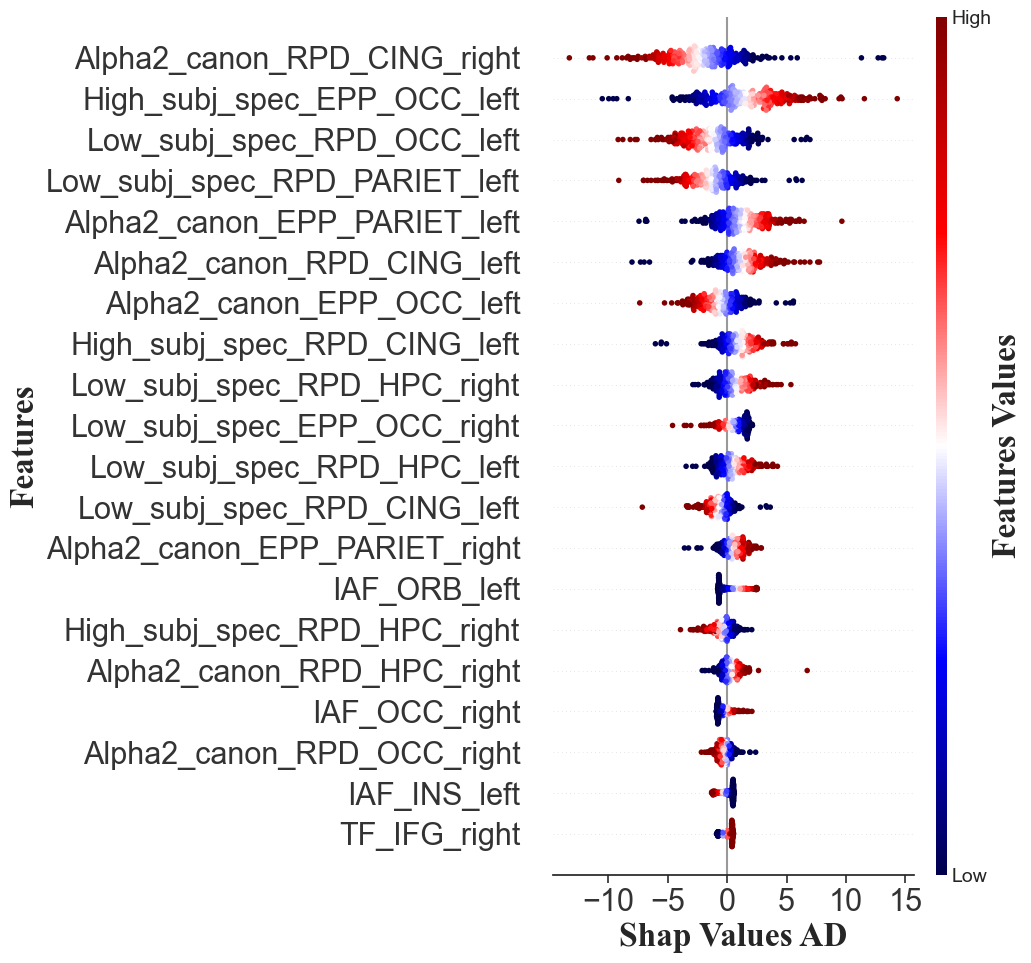

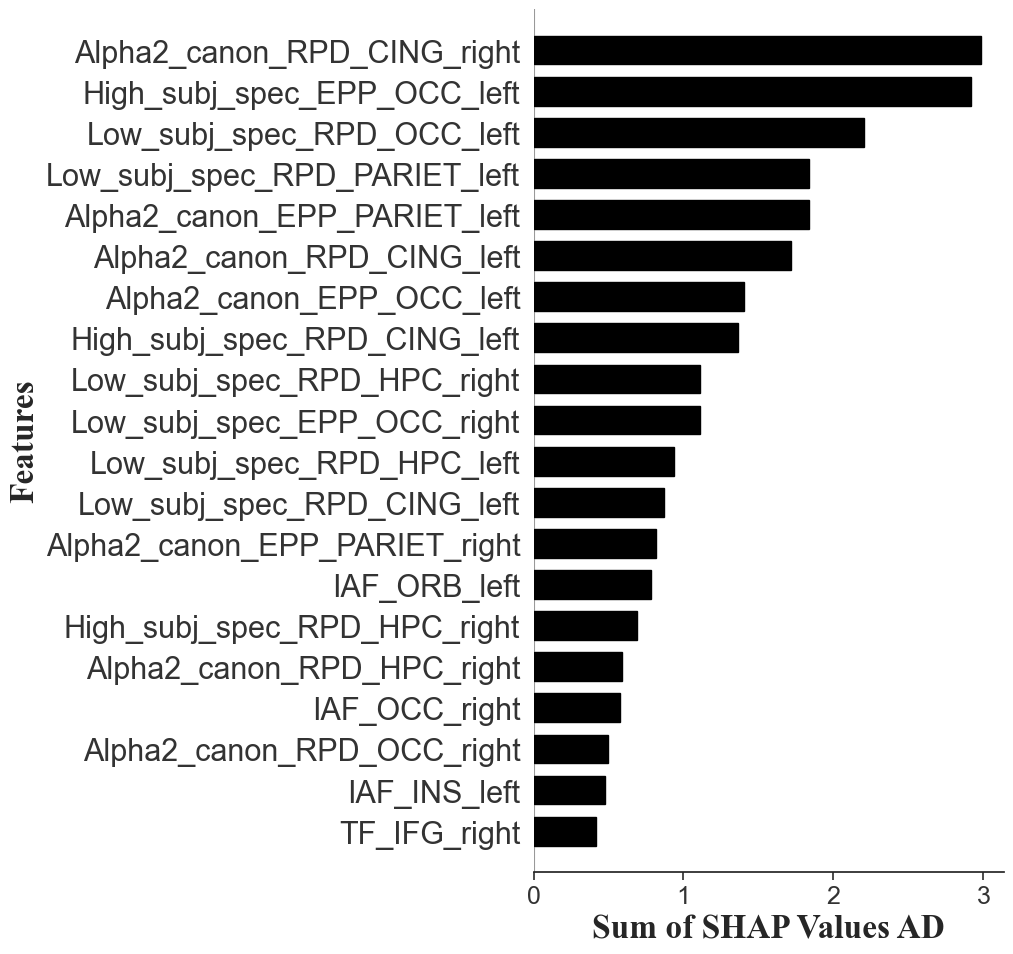

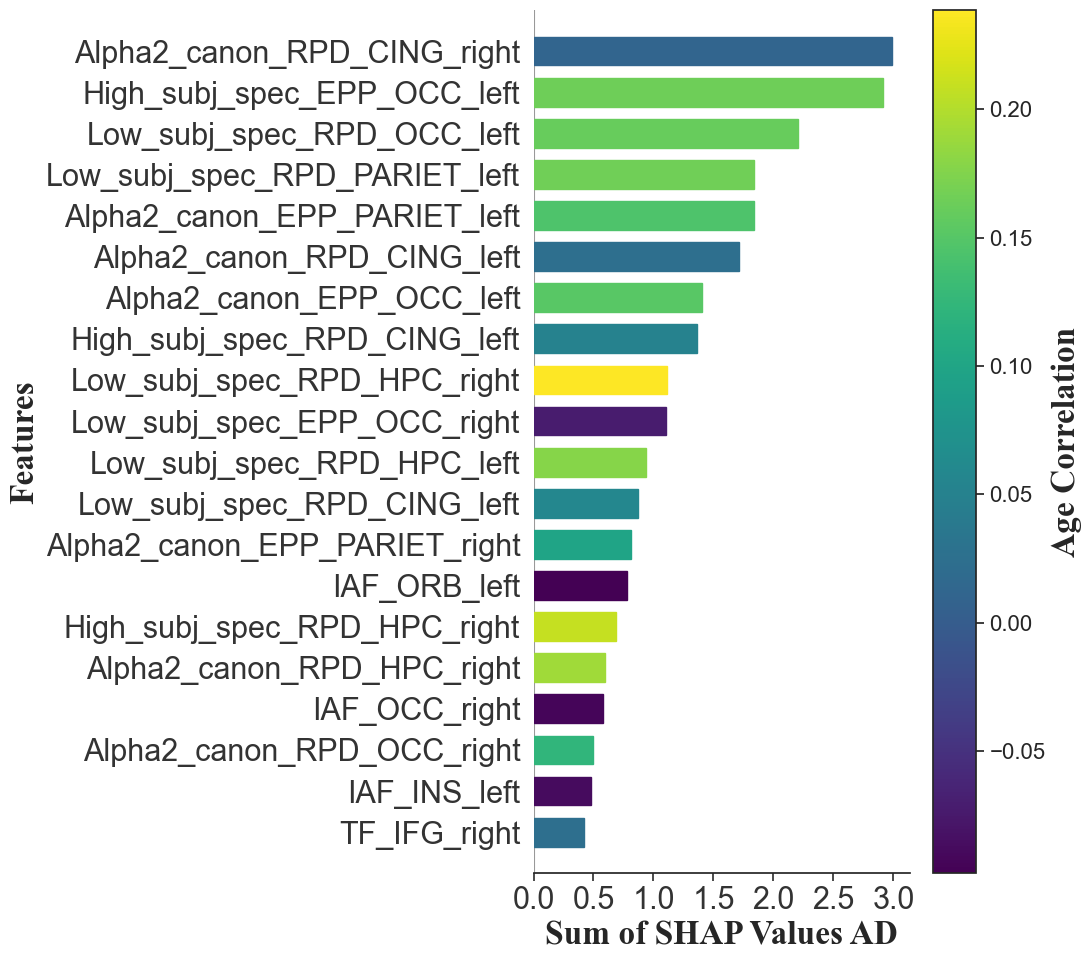

In [96]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_AD,X_test=X_AD,y_test=y_AD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values AD', xlabel2='Sum of SHAP Values AD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [97]:
shap_per_region_sorted_AD, normalized_result_sorted_AD=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_AD, num_max=20)

OCC_left: 1.000000
CING_left: 0.606481
PARIET_left: 0.563731
CING_right: 0.458072
HPC_right: 0.366941
OCC_right: 0.335303
HPC_left: 0.144131
PARIET_right: 0.125268
ORB_left: 0.120101
INS_left: 0.073044
IFG_right: 0.064295


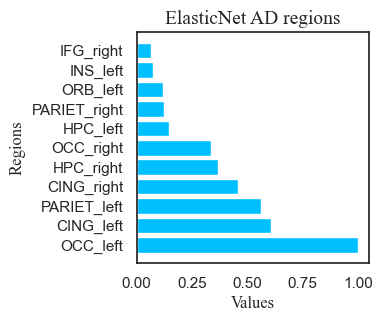

In [98]:
Plotters.plot_normalized_values(normalized_result_sorted_AD, color='deepskyblue', name_set='ElasticNet AD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

In [ ]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_AD, base_path, color='deepskyblue')

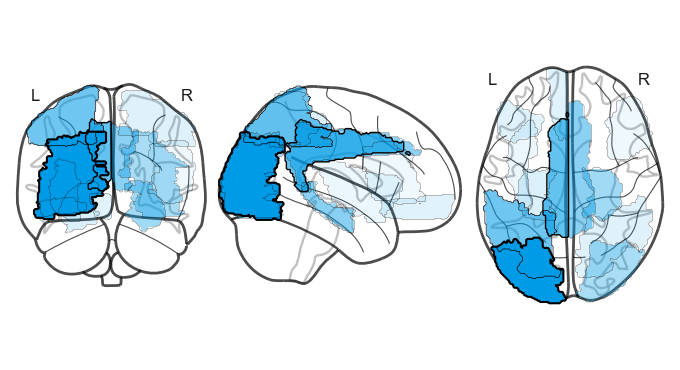

In [114]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_AD, base_path, color="#009BE6" )

# SHAP FTD

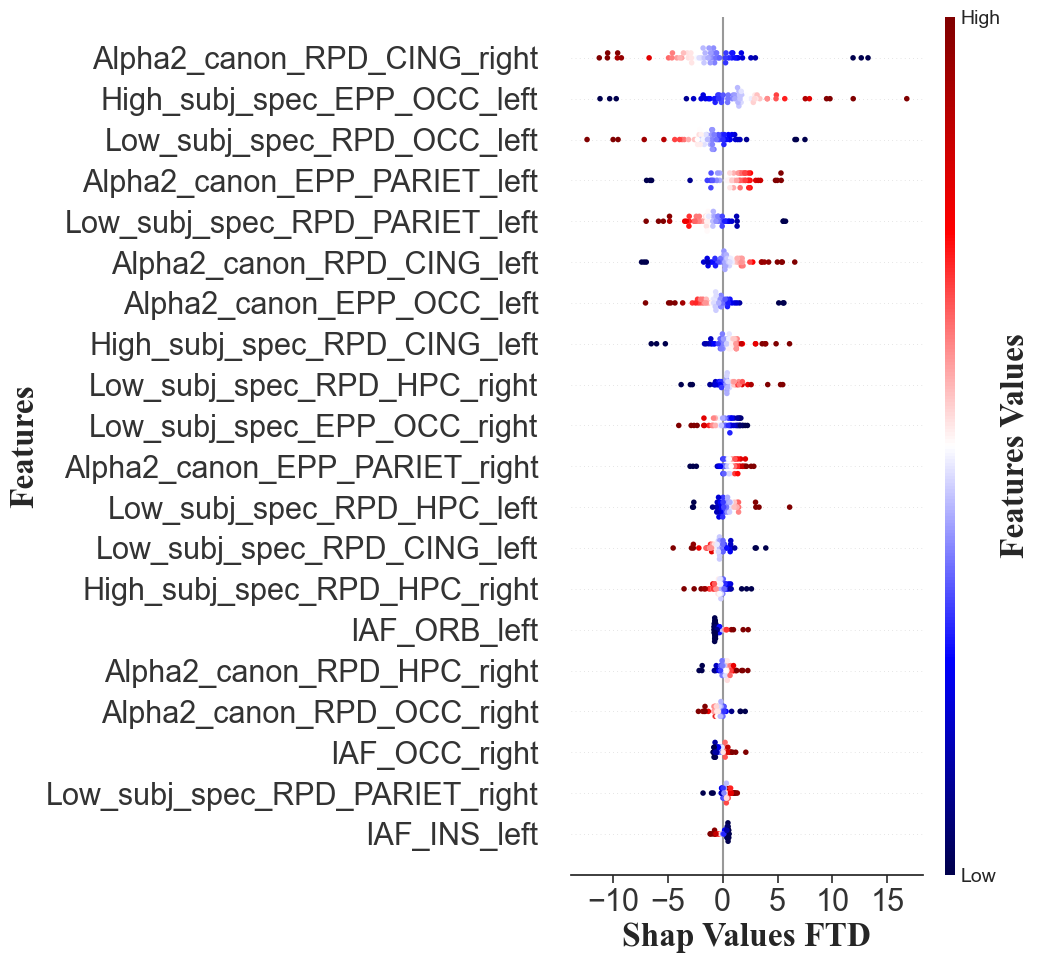

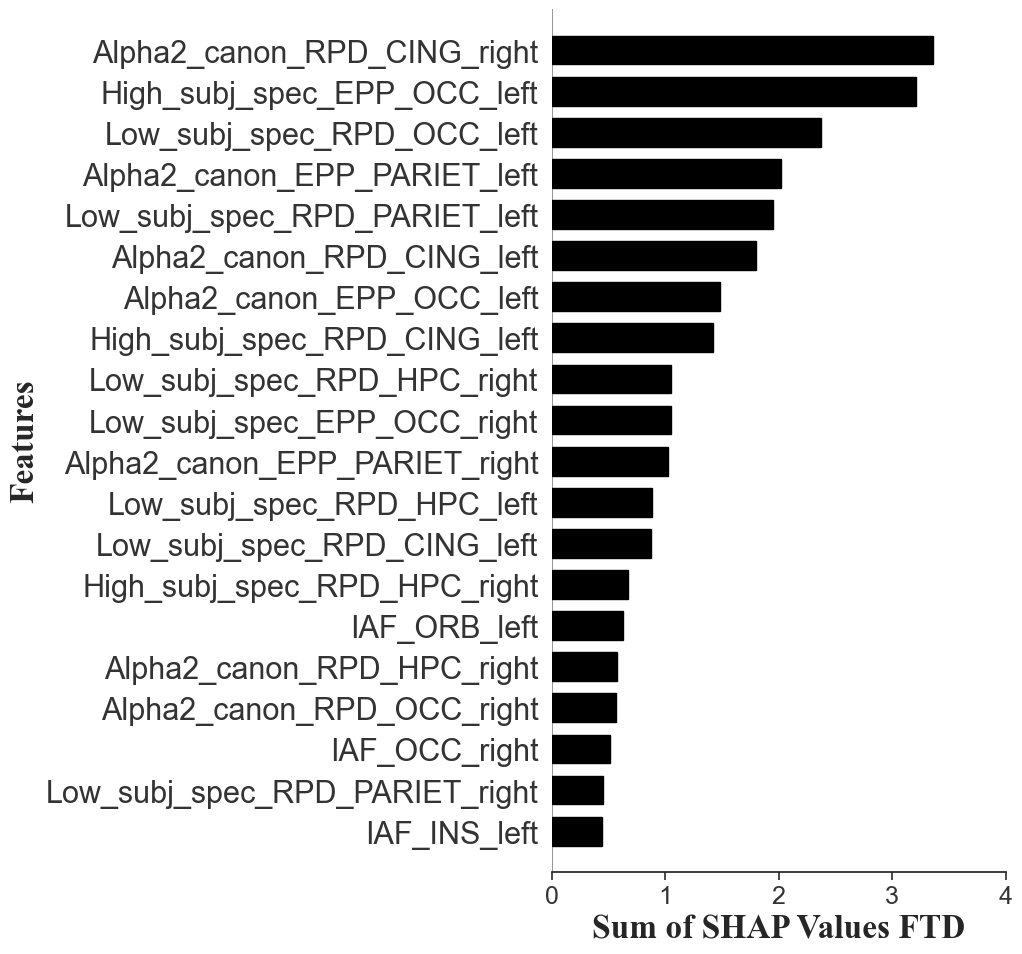

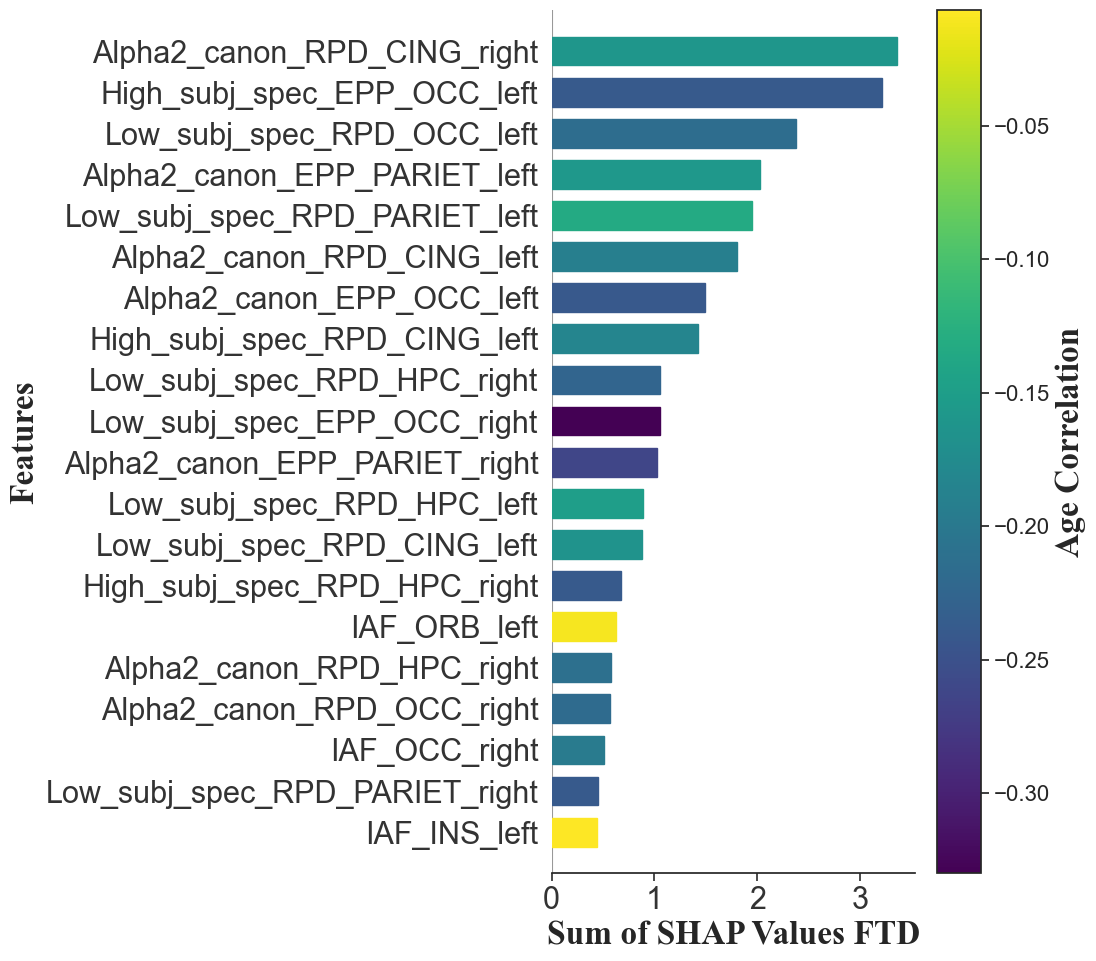

In [100]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_FTD,X_test=X_FTD,y_test=y_FTD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values FTD', xlabel2='Sum of SHAP Values FTD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [101]:
shap_per_region_sorted_FTD, normalized_result_sorted_FTD=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_FTD, num_max=20)

OCC_left: 1.000000
CING_left: 0.579417
PARIET_left: 0.561710
CING_right: 0.475390
HPC_right: 0.325958
OCC_right: 0.300830
PARIET_right: 0.209551
HPC_left: 0.125187
ORB_left: 0.088534
INS_left: 0.062897


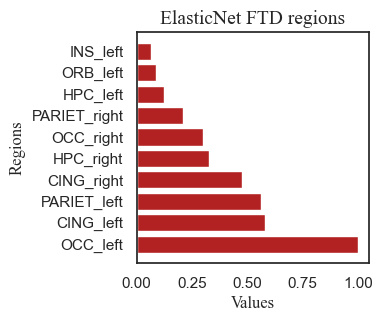

In [102]:
Plotters.plot_normalized_values(normalized_result_sorted_FTD, color='firebrick', name_set='ElasticNet FTD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

In [ ]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_FTD, base_path, color='firebrick')

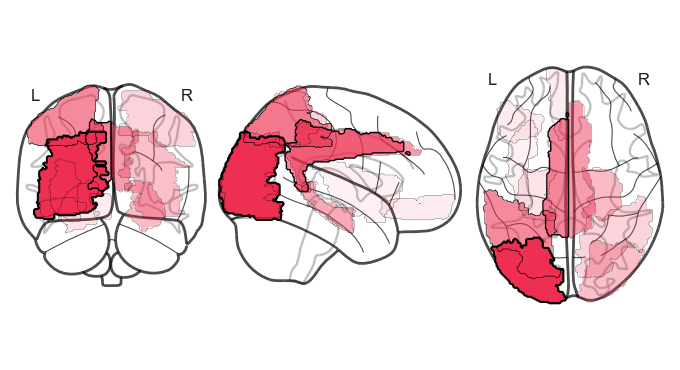

In [115]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_FTD, base_path, color= '#EE2F51' )

# SHAP MCI

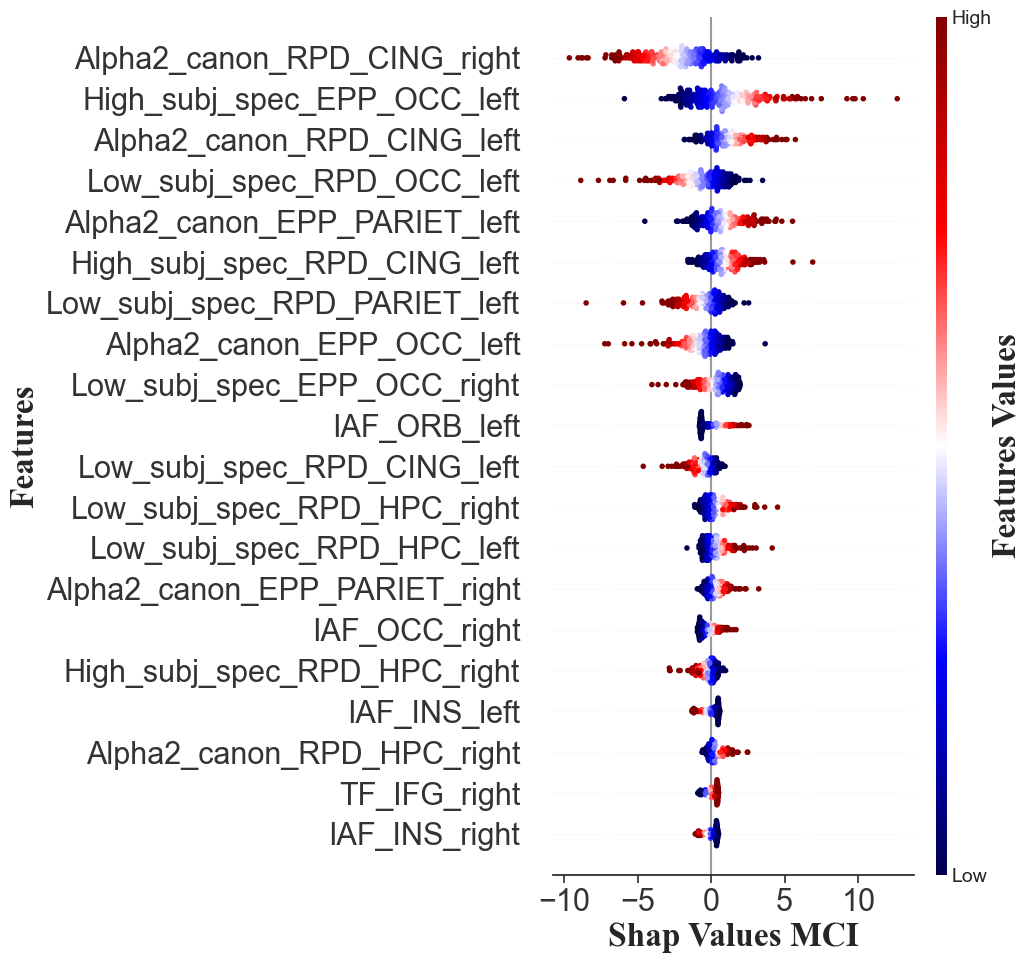

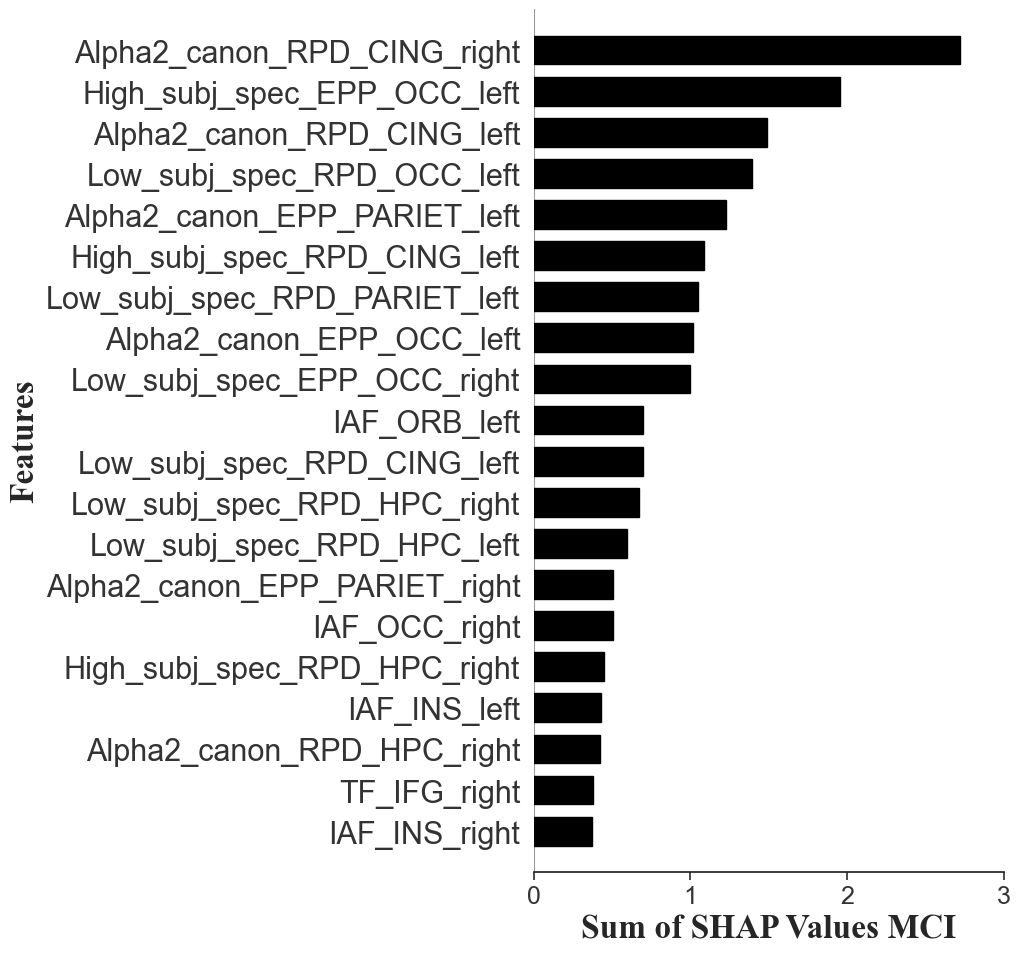

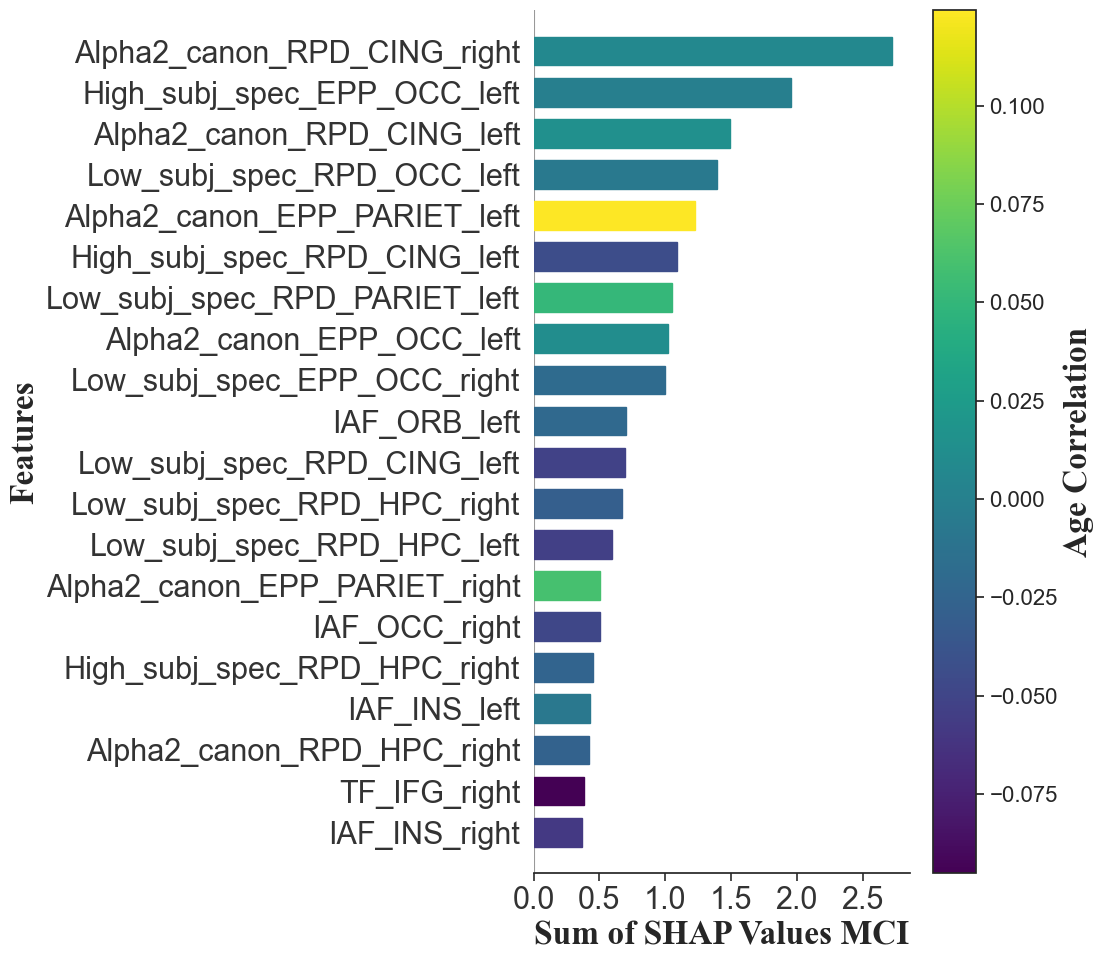

In [104]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_MCI,X_test=X_MCI,y_test=y_MCI, font= "Times New Roman", fontsize=24, xlabel1='Shap Values MCI', xlabel2='Sum of SHAP Values MCI',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [105]:
shap_per_region_sorted_MCI, normalized_result_sorted_MCI=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_MCI, num_max=20)

OCC_left: 1.000000
CING_left: 0.750671
CING_right: 0.623669
PARIET_left: 0.522482
HPC_right: 0.353162
OCC_right: 0.344638
ORB_left: 0.160699
HPC_left: 0.136234
PARIET_right: 0.115925
INS_left: 0.098866
IFG_right: 0.087042
INS_right: 0.084806


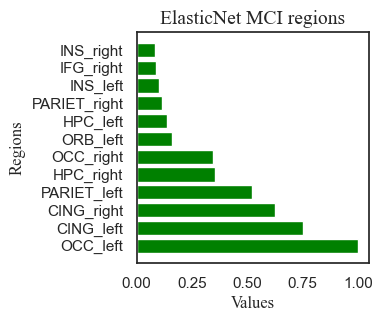

In [106]:
Plotters.plot_normalized_values(normalized_result_sorted_MCI, color='green', name_set='ElasticNet MCI regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

In [ ]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_MCI, base_path, color='green')

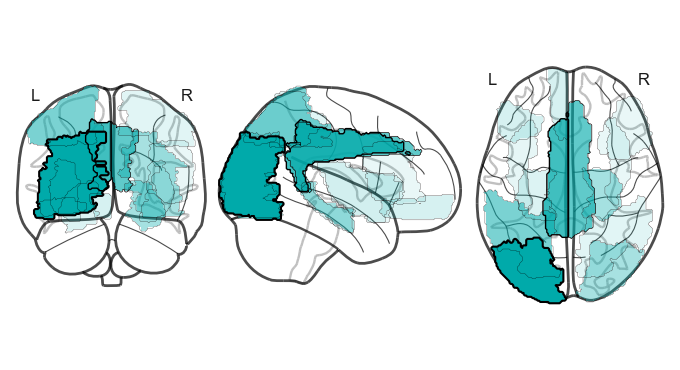

In [116]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_MCI, base_path, color='#00AAAA')